In [27]:
from Preprocessing import *;
from sklearn.model_selection import train_test_split;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from skfeature.function.similarity_based import fisher_score;
from skfeature.function.statistical_based import gini_index;
import seaborn as sns
plt.style.use('ggplot')

In [24]:
data = train_df.reset_index(drop=True)

# 1. Feature Selection

Since the building_id, listing_id, and manager_id are neither categorical or numeric data, it really isn't relevant for our model. We will remove these attributes. We will also remove the photos column because we won't be using this in our model either. We will also remove street_address because we can use the display_address as a categorical value since this is just the genral street that the listing is on. This helps identify the general neighbourhood the listing is in for the buyer. The description, created, and features columns are removed because these are represented by newly extracted feature columns from the previous milestone.

In [25]:
data.drop(['photos','listing_id','building_id','manager_id','street_address','features','description','created','display_address'], axis=1, inplace=True)
data

,bathrooms,bedrooms,interest_level,latitude,longitude,price,hour_created,desc_vect,feat_vect
0,1.5,3,medium,40.7145,-73.9425,3000.00,7,,
1,1.0,2,low,40.7947,-73.9667,5465.00,12,,"(0, 21)\t1.0"
2,1.0,1,high,40.7388,-74.0018,2850.00,3,,"(0, 41)\t1.0"
3,1.0,1,low,40.7539,-73.9677,3275.00,2,"(0, 124)\t1.0","(0, 39)\t1.0"
4,1.0,4,low,40.8241,-73.9493,3350.00,1,"(0, 78)\t1.0","(0, 56)\t1.0"
5,2.0,4,medium,40.7429,-74.0028,3272.01,4,,
6,1.0,2,low,40.8012,-73.9660,3600.00,3,"(0, 932)\t1.0","(0, 57)\t1.0"
7,2.0,1,low,40.7427,-73.9957,5645.00,6,,"(0, 21)\t1.0"
8,1.0,1,medium,40.8234,-73.9457,1725.00,2,,"(0, 10)\t1.0"
9,2.0,4,low,40.7278,-73.9808,5800.00,2,,"(0, 19)\t1.0"


## Label encode target

In [6]:
data["interest_level"] = data["interest_level"].astype('category')
data["target"] = data["interest_level"].cat.codes
data.drop(['interest_level'], axis=1, inplace=True)

## Split our data

I will split our input and target variables into X and y respectively. I do this before feature selection to reduce bias by keeping the test data untouched. In this way, the test data doesn't affect our selection methods. Next, we will check the distribution of our target variable to see if we must stratify our training and testing data samples.

In [7]:
X = data.drop(['target'], axis=1)
y = data['target']

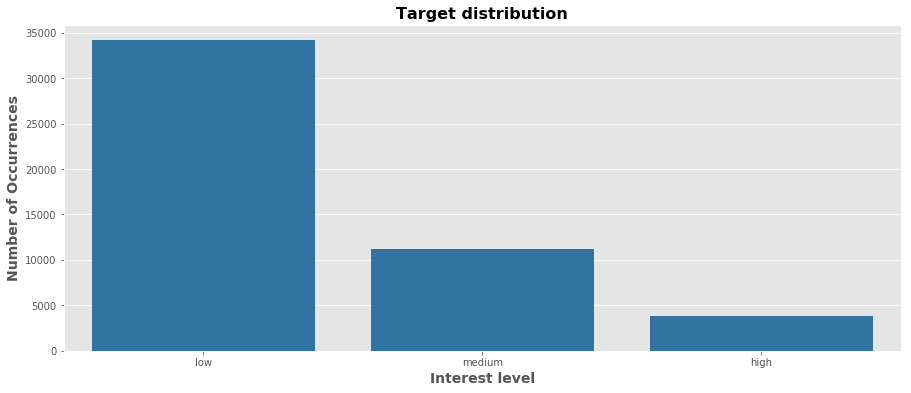

In [47]:
int_level = train_df['interest_level'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(int_level.index, int_level.values, alpha=1, order=['low','medium','high'],color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xlabel('Interest level', fontsize=14, fontweight='bold')
plt.title('Target distribution', fontsize=16, fontweight='bold')
plt.show()

Since the distribution is skewed, we should stratify our data when spliting so it represents our data well.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [28]:
kf = StratifiedKFold(n_splits=5)

## Fisher score

Since this is only valid for numerica features, we must first take a subset of our data. We will separate the data based on interest level to calculate the mean and standard deviation of each class. These values will be used to calculate the fisher score for each feature. We can then use a filtering technique to find the most relevant features based on the scores. 

In [21]:
# take subset
numeric = ['bathrooms','bedrooms','latitude','longitude','price','hour_created']
num_data = data[['bathrooms','bedrooms','latitude','longitude','price','hour_created']]

In [29]:
# separate data
high = train_df[train_df['interest_level'] == 'high']
med = train_df[train_df['interest_level'] == 'medium']
low = train_df[train_df['interest_level'] == 'low']

In [ ]:
# calculate mean and std for each feature
avg = np.array([high.mean(),
      med.mean(),
      low.mean()])
std = np.array([high.std(),
      med.std(),
      low.std()])
p = np.array([high.shape[0]/float(data.shape[0]),
             med.shape[0]/float(data.shape[0]),
             low.shape[0]/float(data.shape[0])]
)
glob_avg = num_data.mean()
p

## First Classifier

The classifier doesn't accept the extracted text features from the previous milestone so for the first classifier they were removed and the classifier was trained for the numerical data only. Gini index was used to determine the best split for each node. The classifier predicted with 64.96% accuracy.

In [26]:
for train_index, valid_index in kf.split(X):
    print("TRAIN:", train_index, "VALIDATION:", valid_index)
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

('TRAIN:', array([ 9840,  9841,  9842, ..., 49194, 49195, 49196]), 'TEST:', array([   0,    1,    2, ..., 9837, 9838, 9839]))
('TRAIN:', array([    0,     1,     2, ..., 49194, 49195, 49196]), 'TEST:', array([ 9840,  9841,  9842, ..., 19677, 19678, 19679]))
('TRAIN:', array([    0,     1,     2, ..., 49194, 49195, 49196]), 'TEST:', array([19680, 19681, 19682, ..., 29516, 29517, 29518]))
('TRAIN:', array([    0,     1,     2, ..., 49194, 49195, 49196]), 'TEST:', array([29519, 29520, 29521, ..., 39355, 39356, 39357]))
('TRAIN:', array([    0,     1,     2, ..., 39355, 39356, 39357]), 'TEST:', array([39358, 39359, 39360, ..., 49194, 49195, 49196]))


In [13]:
# Create classifier object
clf = DecisionTreeClassifier(criterion="Gini", random_state=0)

In [72]:
# Train Decision Tree Classifer
clf = clf.fit(np.array(X_train[numeric]),np.array(y_train),check_input=False)

In [73]:
#Predict the response for test dataset
y_pred = clf.predict(X_test[numeric])

In [74]:
accuracy_score(y_test, y_pred)

0.6495934959349593